###BAN210 Midterm

 QUESTIONS

1. Check the datatypes of the attributes. (3 points)

2. Are there any missing values in the dataset? (4 points)

3. What is the correlation between the attributes other than Quality? (10 points)

4. Graph the frequency distribution of wine quality by using Quality. (10 points)

5. Reduce the levels of rating for quality to three levels as high, medium and low. Assign the levels of 3 and 4 to level 0; 5 and 6 to level 1; and 7,8 and 9 to level 2. (10 points)

6. Normalize the data set. (12 points)

7. Divide the dataset to training and test sets. (12 points)

8. Use the Decision Tree algorithm to predict the quality of wine using its attributes. (12 points)

9. Display the confusion matrix to evaluate the model performance. (12 points)

10. Evaluate the model performance by computing Accuracy. (15 points)


In [2]:
import pandas as pd
import requests

utrl = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"

data = pd.read_csv(utrl,sep = ";")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### Check the datatypes of the attributes.

In [3]:
#1 Check the data types of the attributes
data.dtypes

,0
fixed acidity,float64
volatile acidity,float64
citric acid,float64
residual sugar,float64
chlorides,float64
free sulfur dioxide,float64
total sulfur dioxide,float64
density,float64
pH,float64
sulphates,float64


### Check for missing values in the dataset

In [4]:
#2. Check for missing values in the dataset
data.isnull().sum()
#The output shows that there are no missing values.

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


### What is the correlation between the attributes other than Quality?

In [5]:
#Check the correlation between the attributes except for the 'Quality'
#first we drop the quality column
data_x = data.drop(columns=["quality"])
data_y = data["quality"]

In [6]:
# next we compute correlation matrix
correlation_matrix = data_x.corr()

# Display the correlation matrix
print(correlation_matrix)

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.022697     0.289181   
volatile acidity          -0.022697          1.000000    -0.149472   
citric acid                0.289181         -0.149472     1.000000   
residual sugar             0.089021          0.064286     0.094212   
chlorides                  0.023086          0.070512     0.114364   
free sulfur dioxide       -0.049396         -0.097012     0.094077   
total sulfur dioxide       0.091070          0.089261     0.121131   
density                    0.265331          0.027114     0.149503   
pH                        -0.425858         -0.031915    -0.163748   
sulphates                 -0.017143         -0.035728     0.062331   
alcohol                   -0.120881          0.067718    -0.075729   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.089021   0.023086            -0.049396   
volatile acidit

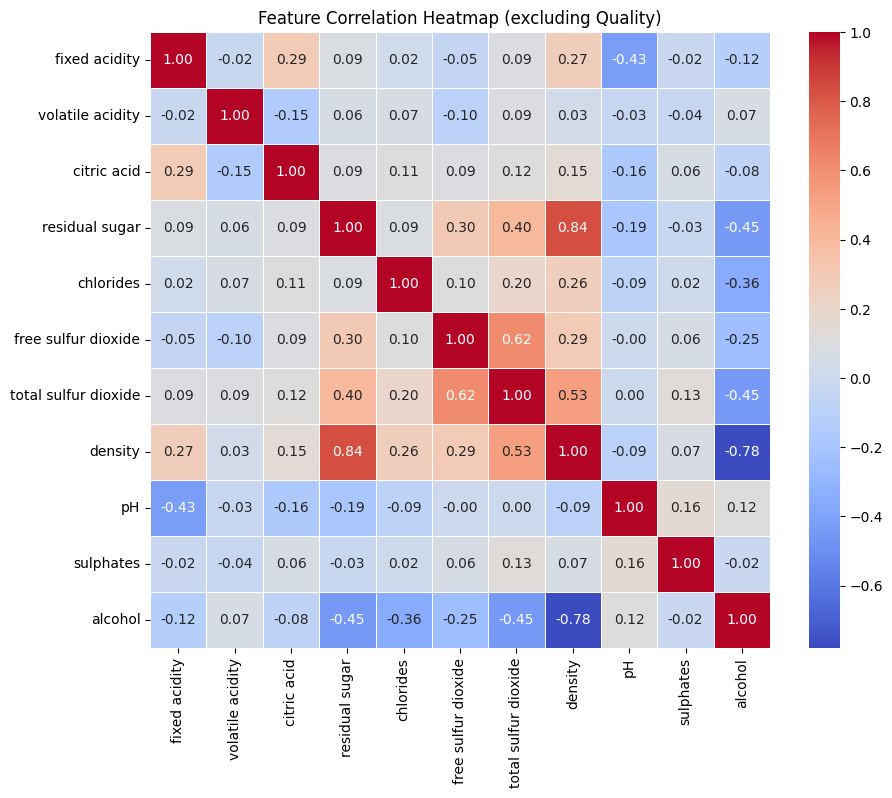

In [7]:
# for added visual appeal we visualize the matrix.

import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(10, 8))

# Create heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Display the heatmap
plt.title("Feature Correlation Heatmap (excluding Quality)")
plt.show()

In [8]:
#To Display positvely strong correlated features
# Find highly correlated feature pairs
high_corr = correlation_matrix.abs().unstack().sort_values(ascending=False)

# Remove self-correlations (correlation of a feature with itself is always 1)
high_corr = high_corr[high_corr < 1].drop_duplicates()

# Display strongly correlated pairs (above 0.5)
print(high_corr[high_corr > 0.5])

residual sugar       density                 0.838966
density              alcohol                 0.780138
free sulfur dioxide  total sulfur dioxide    0.615501
density              total sulfur dioxide    0.529881
dtype: float64


##Graph the frequency distribution of wine quality by using Quality. (10 points)

<ipython-input-9-77613dcca5bb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data["quality"], palette="viridis")


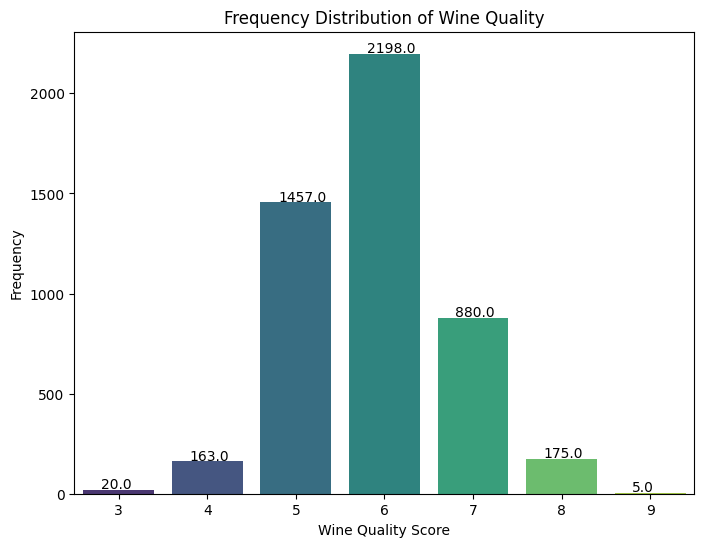

In [9]:
#4. Plot frequency distribution
plt.figure(figsize=(8, 6))
sns.countplot(x=data["quality"], palette="viridis")

# Label the chart
plt.xlabel("Wine Quality Score")
plt.ylabel("Frequency")
plt.title("Frequency Distribution of Wine Quality")

# Show the values on the bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + 0.2, p.get_height() + 5))

# Display the plot
plt.show()

###Reduce the levels of rating for quality to three levels as high, medium and low. Assign the levels of 3 and 4 to level 0; 5 and 6 to level 1; and 7,8 and 9 to level 2. (10 points)

In [10]:
# 5. We create a new column called 'quality_level' with three categories as advised
data['quality_level'] = data['quality'].apply(lambda x: 0 if x in [3, 4] else (1 if x in [5, 6] else 2))

# verify that the category has been created
data[['quality', 'quality_level']].head(10)

,quality,quality_level
0,6,1
1,6,1
2,6,1
3,6,1
4,6,1
5,6,1
6,6,1
7,6,1
8,6,1
9,6,1


<ipython-input-11-3418467bc468>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data["quality_level"], palette="magma")


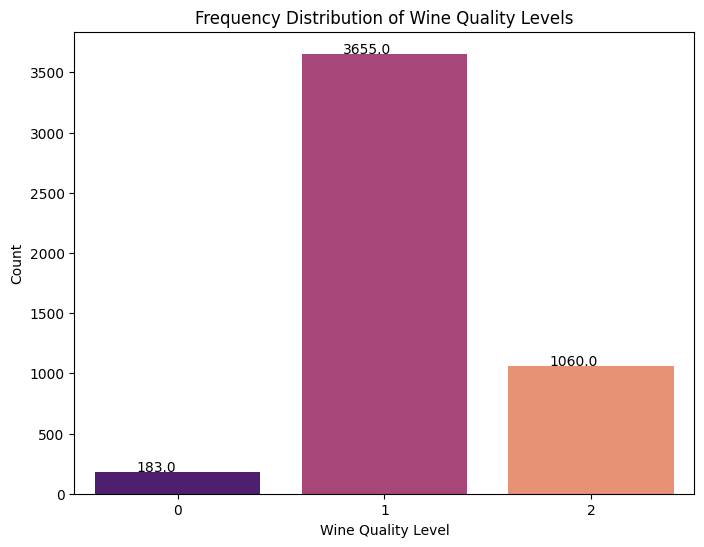

In [11]:
# to visualize the 3 amount per 3 tiered category created in the earlier code on a chart.
plt.figure(figsize=(8, 6))
sns.countplot(x=data["quality_level"], palette="magma")

# Label the graph charts
plt.xlabel("Wine Quality Level")
plt.ylabel("Count")
plt.title("Frequency Distribution of Wine Quality Levels")

# Show the values on the bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + 0.2, p.get_height() + 5))

plt.show()

###Normalize the dataset

In [12]:
#6. To normalize the dataset
from sklearn.preprocessing import MinMaxScaler

# Select only numerical features (excluding 'quality' and 'quality_level')
features = data.drop(columns=["quality", "quality_level"])

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
normalized_features = scaler.fit_transform(features)

# Convert back to DataFrame
data_normalized = pd.DataFrame(normalized_features, columns=features.columns)

# Add back the target variables
data_normalized["quality"] = data["quality"]
data_normalized["quality_level"] = data["quality_level"]

# Display the first few rows
data_normalized.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_level
0,0.307692,0.186275,0.216867,0.308282,0.106825,0.149826,0.373550,0.267785,0.254545,0.267442,0.129032,6,1
1,0.240385,0.215686,0.204819,0.015337,0.118694,0.041812,0.285383,0.132832,0.527273,0.313953,0.241935,6,1
2,0.413462,0.196078,0.240964,0.096626,0.121662,0.097561,0.204176,0.154039,0.490909,0.255814,0.338710,6,1
3,0.326923,0.147059,0.192771,0.121166,0.145401,0.156794,0.410673,0.163678,0.427273,0.209302,0.306452,6,1
4,0.326923,0.147059,0.192771,0.121166,0.145401,0.156794,0.410673,0.163678,0.427273,0.209302,0.306452,6,1


### Divide the dataset to training and test sets.

In [13]:
#7. To divide the datset to training and test sets we import the train_test_split
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = data_normalized.drop(columns=["quality", "quality_level"])  # Training Features
y = data_normalized["quality_level"]  # Target or label variable

# Split into 80% training and 20% test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the shape of the datasets
print(f"Training set: X_train = {X_train.shape}, y_train = {y_train.shape}")
print(f"Test set: X_test = {X_test.shape}, y_test = {y_test.shape}")

Training set: X_train = (3918, 11), y_train = (3918,)
Test set: X_test = (980, 11), y_test = (980,)


### Use the Decision Tree algorithm to predict the quality of wine using its attributes.

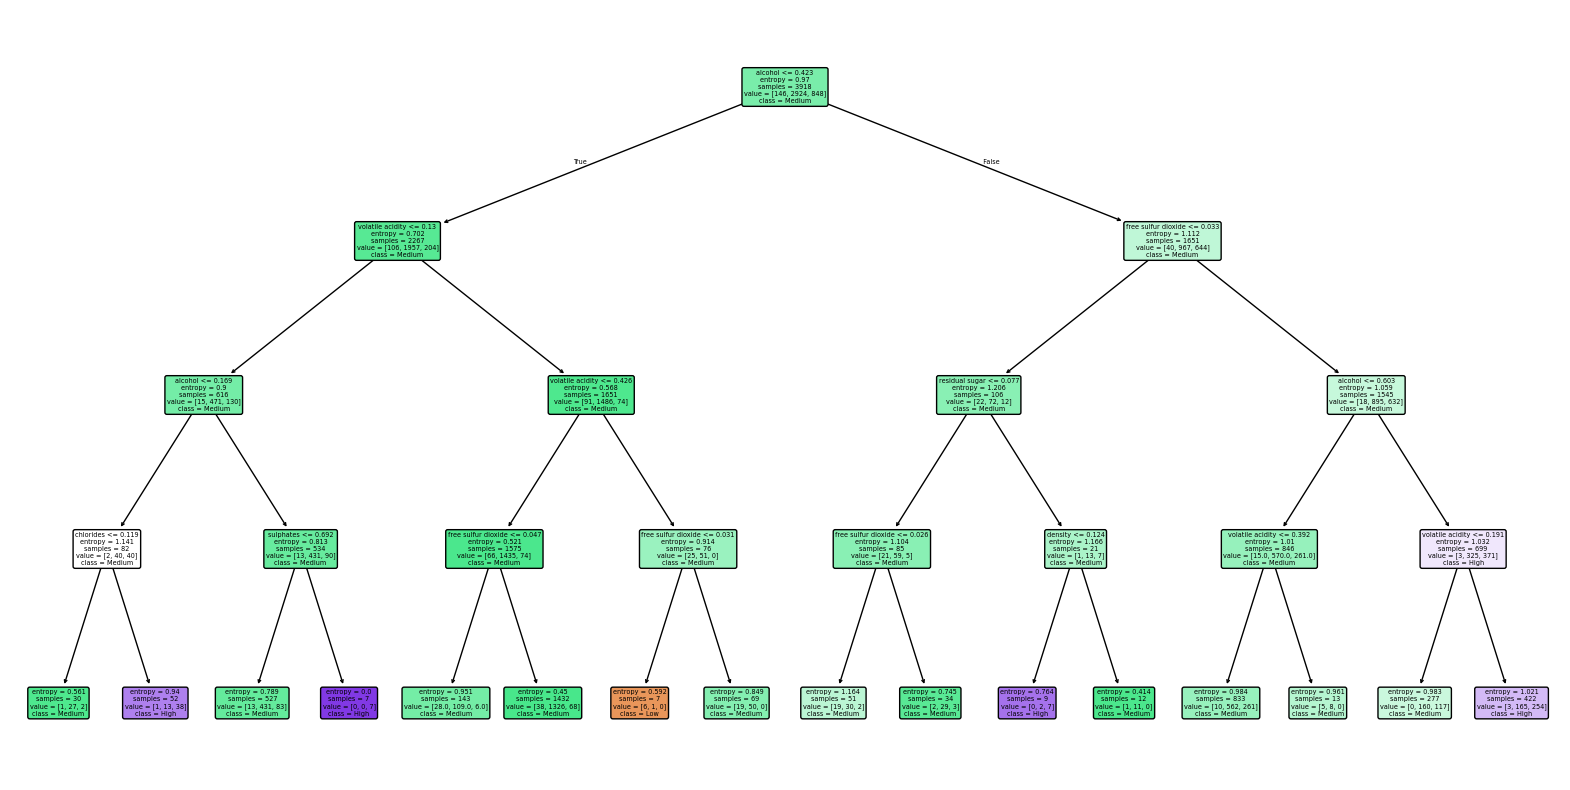

In [18]:
#8. To achieve this we import the DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the Decision Tree Classifier
decision_tree_model = DecisionTreeClassifier(
    criterion="entropy",  # or "entropy"
    max_depth=4,  # Limits depth to 4 levels
    min_samples_split=10,  # Node must have at least 10 samples to split
    min_samples_leaf=5,  # Each leaf must contain at least 5 samples
    random_state=42
)
# Train the model
decision_tree_model.fit(X_train, y_train)
# Make predictions on the test set
y_pred = decision_tree_model.predict(X_test)
from sklearn.tree import plot_tree
# Set figure size
plt.figure(figsize=(20, 10))
# Plot the tree
plot_tree(decision_tree_model, feature_names=X.columns, class_names=["Low", "Medium", "High"], filled=True, rounded=True)
# Show the plot
plt.show()


### Display the confusion matrix to evaluate the model performance.

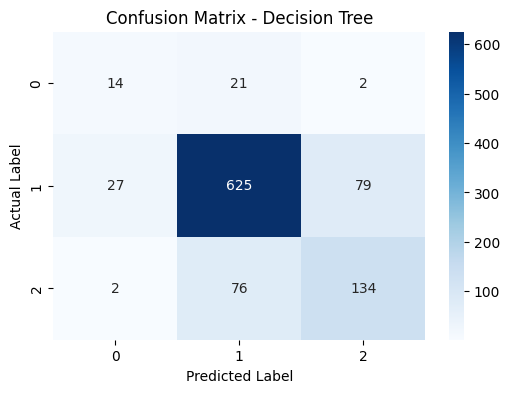

In [15]:
# Display confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix - Decision Tree")
plt.show()

### Evaluate the model performance by computing Accuracy.

In [16]:
# To do this we import the accuracy_score function
from sklearn.metrics import accuracy_score
#Compute Accuracy
accuracy = accuracy_score(y_test, y_pred)
# Display the result
print(f"Decision Tree Accuracy: {accuracy:.4f}")

#it is good practice to compare accuracy with other metrics.

# Display classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Decision Tree Accuracy: 0.7888

Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.38      0.35        37
           1       0.87      0.85      0.86       731
           2       0.62      0.63      0.63       212

    accuracy                           0.79       980
   macro avg       0.60      0.62      0.61       980
weighted avg       0.79      0.79      0.79       980



#### From the above visuals we can see that
1. the model performs well at predicting medium-quality wines (Category 1), but struggles with low-quality wines (Category 0).
2. High-quality wine predictions (Category 2) are moderate and the model is biased towards this class maybe cos of the frequency in that category and
low-quality wines (Category 0) are rarely predicted correctly.